# Imports

In [1]:
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

from src.algorithms import AbstractMetropolisHastings

figsize(20, 3)

# VMC Setup

The goal of this section is to calculate $\int ... dR $

$$
\left \{
\begin{array}{rll}
H &= - \frac{\partial^2}{2 \partial x^2} +V(x) & \text{Hamiltonian}\\
\psi(R) &= \exp({-p_0(x-p_1)^2-p_2(x-p_3)^2}) & \text{Wave function}\\
E_L(R) &= \frac{H\psi(R)}{\psi(R)} = V(x) - \frac{1}{2}\frac{\partial^2}{\partial x^2}\psi(x) & \text{"Local" energy}\\
V(x) &= \frac{a_2}{2}x^2 + a_4x^4 & \text{Potential energy}\\
G(R,R', \beta) &= \braket{R | e^{- \beta H} | R'} & \text{???}\\
\Pi(R) &\propto | \psi(R) |^2 & \text{Sampling probability???}\\
\end{array}
\right .
$$

In [2]:
class VMC(AbstractMetropolisHastings[float]):
    a = [1, 0]
    p = [.0002, 0, 0, 0]
    sigma = 5

    def generator_function(self):
        return self.current_configuration + np.random.normal(0, self.sigma)

    def state_likelihood(self, x: float):
        # This is proportional to the state probability
        p = self.p
        aux_exp = lambda mu, sigma: np.prod([-1, mu, x - sigma, x - sigma])
        return np.exp(aux_exp(p[0], p[1]) + aux_exp(p[2], p[3]))


In [3]:
vmc = VMC(initial_configuration=np.random.normal(0, 1))

# Likelihood plot

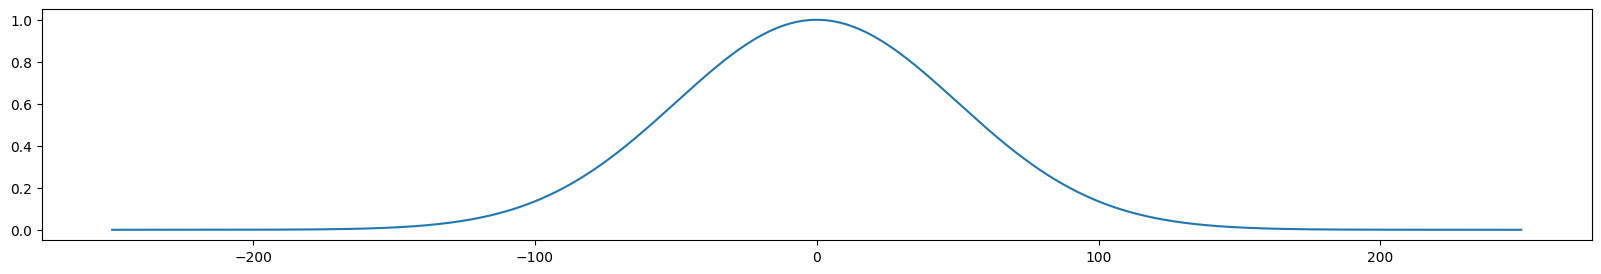

In [4]:
datapoints = np.linspace(-250, 250, 10000)
plt.plot(datapoints, [vmc.state_likelihood(x) for x in datapoints])

# Trial run

In [5]:
vmc.run_iterations(10 ** 7)

Rejected 3.2%: 100%|██████████| 10000000/10000000 [03:32<00:00, 47062.58it/s]


# Plots

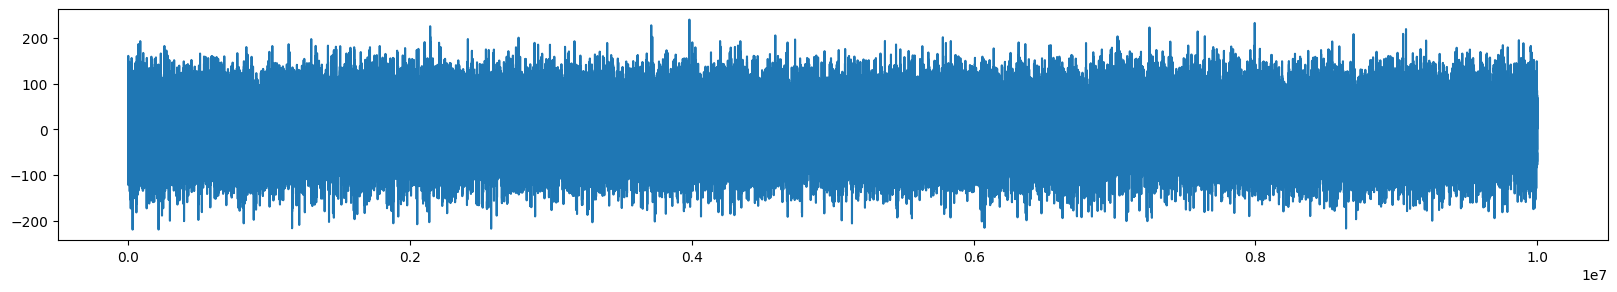

In [8]:
plt.plot(vmc.configuration_history)

(array([1.30000e+01, 2.50000e+01, 5.20000e+01, 8.20000e+01, 1.47000e+02,
        2.20000e+02, 3.09000e+02, 4.49000e+02, 7.10000e+02, 9.28000e+02,
        1.24500e+03, 1.60000e+03, 1.86800e+03, 2.46200e+03, 3.28200e+03,
        4.34000e+03, 5.62800e+03, 7.21000e+03, 9.09800e+03, 1.19730e+04,
        1.50120e+04, 1.85270e+04, 2.36460e+04, 2.85350e+04, 3.47940e+04,
        4.29940e+04, 5.11350e+04, 6.18030e+04, 7.19290e+04, 8.54980e+04,
        9.93760e+04, 1.15454e+05, 1.32929e+05, 1.51182e+05, 1.70625e+05,
        1.90041e+05, 2.12192e+05, 2.34123e+05, 2.54250e+05, 2.74812e+05,
        2.93279e+05, 3.09738e+05, 3.27849e+05, 3.42982e+05, 3.54557e+05,
        3.66738e+05, 3.75765e+05, 3.78929e+05, 3.77614e+05, 3.72010e+05,
        3.63341e+05, 3.52361e+05, 3.38699e+05, 3.23459e+05, 3.05585e+05,
        2.85498e+05, 2.65733e+05, 2.45395e+05, 2.24443e+05, 2.04144e+05,
        1.83507e+05, 1.62386e+05, 1.44417e+05, 1.27227e+05, 1.10679e+05,
        9.48560e+04, 8.14920e+04, 6.91010e+04, 5.77

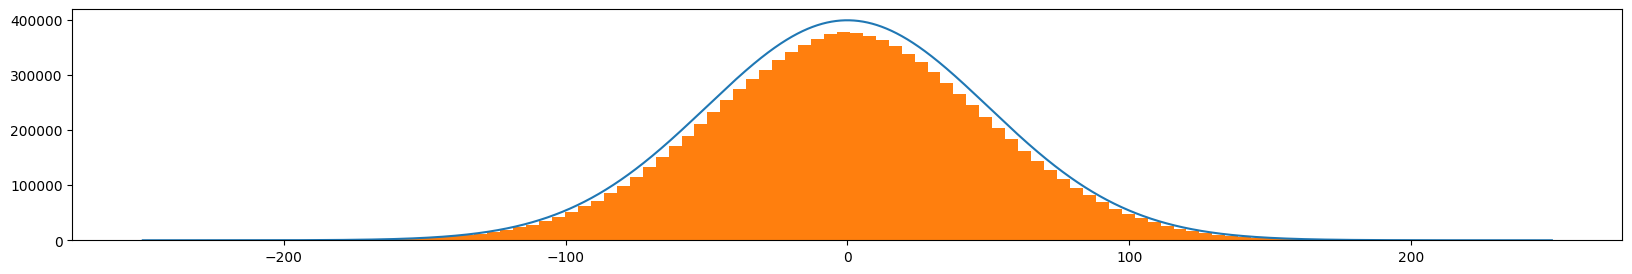

In [6]:
# 4*10**5 is used to put both plots in the same scale.
# I'd like a neater way of lining the 2 plots
plt.plot(datapoints, [4 * 10 ** 5 * vmc.state_likelihood(x) for x in datapoints])
plt.hist(vmc.configuration_history, bins=100, density=False)